# Sorting-Algorithms

Mathematical and theoretical stuff will be added later or in an accompanying markdown file.

## Auxiliary Functions

In [1]:
def cmp(x, y):
    return x <= y

In [2]:
def swap(x, y, L):
    tmp = L[x]
    L[x] = L[y]
    L[y] = tmp

In [3]:
class testFailed(Exception):
    '''Throw when a test fails'''

## Insertion Sort

### Iterative

#### Idea:
- Loop through L, where i is the current index
- At the beginning of the loop, the subarray `L[:i]` is sorted.
- At the end of the loop, the subarray `L[:i+1]` is sorted

In [4]:
def insertionSortIterative(L: list, cmp):
    for i in range(1, len(L)):
        val = L[i]
        j = i-1
        while j >= 0 and not cmp(L[j], val):
            L[j+1] = L[j]
            j -= 1
        L[j+1] = val
    return L

### Recursive

#### Idea:
- Take the first element of the list and recursively sort the rest of the list
- Insert the first element into the sorted rest
- Insertion works by recursively going through the list
- Essentially this is a much less efficient version of the iterative algorithm, yet reversed, first sorting the end of the array and then its beginning

In [5]:
def insertionSortRecursive(L: list, cmp):
    if L == []:
        return L
    x, *R = L
    return insert(x, insertionSortRecursive(R, cmp), cmp)

def insert(x, L: list, cmp):
    if L == []:
        return [x]
    y, *R = L
    if cmp(x, y):
        return [x, y] + R
    else:
        return [y] + insert(x, R, cmp)

## Selection Sort

In [6]:
def selectionSortIterative(L: list, cmp):
    for i in range(len(L)-1):
        x = i
        for j in range(i+1, len(L)):
            if not cmp(L[x], L[j]):
                x = j
        tmp = L[x]
        L[x] = L[i]
        L[i] = tmp
    return L

In [7]:
def selectionSortRecursive(L: list, cmp):
    if L == []:
        return L
    x, R = select(L, cmp)
    return [x] + selectionSortRecursive(R, cmp)

def select(L: list, cmp):
    x = L.pop(0)
    if L == []:
        return x, []
    y = L.pop(0)
    if cmp(x, y):
        x, R = select([x] + L, cmp)
        return x, [y] + R
    else:
        y, R = select([y] + L, cmp)
        return y, [x] + R

## Merge Sort

In [8]:
def mergeSortRecursive(L, cmp):
    n = len(L)
    if n < 2:
        return L
    h = n//2
    L1, L2 = mergeSortRecursive(L[:h], cmp), mergeSortRecursive(L[h:], cmp)
    return mergeRecursive(L1, L2, cmp)

def mergeRecursive(L, R, cmp):
    if L == []:
        return R
    if R == []:
        return L
    if cmp(L[0], R[0]):
        return L[0:1] + mergeRecursive(L[1:], R, cmp)
    else:
        return R[0:1] + mergeRecursive(L, R[1:], cmp)

In [9]:
def mergeSortHalfRecursive(L, cmp):
    n = len(L)
    if n < 2:
        return L
    h = n//2
    L1, L2 = mergeSortHalfRecursive(L[:h], cmp), mergeSortHalfRecursive(L[h:], cmp)
    return mergeHalfRecursive(L1, L2, cmp)

def mergeHalfRecursive(L, R, cmp):
    S = []
    while len(L) > 0 and len(R) > 0:
        if cmp(L[0], R[0]):
            S.append(L.pop(0))
        else:
            S.append(R.pop(0))
    if L == []:
        return S + R
    elif R == []:
        return S + L
    else:
        return S

In [10]:
def mergeSortInPlace(L, cmp):
    A = L[:]
    mSortInPlace(L, A, 0, len(L))
    return L

def mSortInPlace(L, A, start, end):
    if end - start < 2:
        return
    h = (start + end) // 2
    mSortInPlace(L, A, start, h)
    mSortInPlace(L, A, h, end)
    mergeInPlace(L, A, start, h, end)

def mergeInPlace(L, A, start, middle, end):
    A[start:end] = L[start:end]
    idx = start
    i = start
    j = middle
    while i < middle and j < end:
        if cmp(A[i], A[j]):
            L[idx] = A[i]
            i += 1
        else:
            L[idx] = A[j]
            j += 1
        idx += 1
    if i < middle:
        L[idx:end] = A[i:middle]
    elif j < end:
        L[idx:end] = A[j:end]

In [11]:
def mergeSortIterative(L, cmp):
    A = L[:]
    mSortIterative(L, A)
    return L

def mSortIterative(L, A):
    n = 1
    while n < len(L):
        k = 0
        while n * k + n < len(L):
            top = min(n * k + 2 * n, len(L))
            mergeIterative(L, n * k, n * k + n, top, A)
            k += 2    
        n *= 2

def mergeIterative(L, start, middle, end, A):
    A[start:end] = L[start:end]
    idx1 = start
    idx2 = middle
    i    = start
    while idx1 < middle and idx2 < end:
        if A[idx1] <= A[idx2]:
            L[i]  = A[idx1]
            idx1 += 1
        else:
            L[i]  = A[idx2]
            idx2 += 1
        i += 1
    if idx1 < middle:
        L[i:end] = A[idx1:middle]
    if idx2 < end:
        L[i:end] = A[idx2:end]    

### Three-Way Merge Sort

In [12]:
def threeWayMSort(L, cmp):
    pass

In [13]:
def threeWayMSortInPlace(L, cmp):
    pass

## Quick Sort

In [14]:
def quickSort(L, cmp):
    if L == []:
        return L
    pivot, *R = L
    B = [x for x in R if not cmp(x, pivot)]
    S = [x for x in R if cmp(x, pivot)]
    return quickSort(S, cmp) + [pivot] + quickSort(B, cmp)

### Dual-Pivot-QuickSort

In [15]:
def dualPivotQuickSort(L, cmp):
    if len(L) <= 1:
        return L
    x, y = L.pop(0), L.pop(-1)
    p = min(x, y)
    q = max(x, y)
    
    S = [x for x in L if cmp(x, p) and x != p]
    M = [x for x in L if cmp(p, x) and cmp(x, q)]
    B = [x for x in L if not cmp(x, q)]
    if p == q:
        return dualPivotQuickSort(S, cmp) + [p] + M + [q] + dualPivotQuickSort(B, cmp)
    else:
        return dualPivotQuickSort(S, cmp) + [p] + dualPivotQuickSort(M, cmp) + [q] + dualPivotQuickSort(B, cmp)

In [16]:
def dualPivotQuickSortInPlace(L, cmp):
    dualPivotQSortInPlace(L, 0, len(L)-1, cmp)
    return L

def dualPivotQSortInPlace(L, start, end, cmp):
    if end <= start:
        return
    i, j = dualPivotPartitionInPlace(L, start, end, cmp)
    #print((i, j, L[start:end+1]))
    dualPivotQSortInPlace(L, start, i-1, cmp)
    if L[i] != L[j]:
        dualPivotQSortInPlace(L, i+1, j-1, cmp)
    dualPivotQSortInPlace(L, j+1, end, cmp)

Loop Invariant for dualPivotPartition:

$$
\forall x \in \{p+1, ..., i\} L[x] < L[p] \\
\forall x \in \{i+1, ..., j-1\} L[x] \ge L[p] \land L[x] \le L[q] \\
\forall x \in \{j+1, ..., k\} L[x] > L[p] \\
$$

In [17]:
def dualPivotPartitionInPlace(L, p, q, cmp):
    if L[p] > L[q]:
        swap(p, q, L)
    if q - p < 2:
        return p, q
    
    i, j = p, p+1
    for k in range(p+1, q):
        #print(L[p:k+1])
        if L[k] < L[p]:
            i += 1
            j += 1
            swap(j-1, k, L)
            swap(i, j-1, L)
        elif L[k] <= L[q]:
            j += 1
            swap(j-1, k, L)
        else:
            pass
        #print((i-p, j-p, k-p, L[p:k+1]))
    swap(j, q, L)
    swap(i, p, L)
    return i, j

## Counting Sort

# Testing

## Testing Methods

In [18]:
import matplotlib.pyplot as plt
import random as rnd
from collections import Counter
from timeit import timeit

In [19]:
def isOrdered(L, cmp):
    for i in range(len(L) - 1):
        if not cmp(L[i], L[i+1]):
            return False
    return True

In [20]:
def sameElements(M, N):
        return Counter(M) == Counter(N)

In [21]:
def singleTest(sort, listLength:int=1_000, compare=cmp, maxEl:int=10_000, minEl:int=0, toLog=True):
    L = [ rnd.randrange(minEl, maxEl) for x in range(listLength) ]
    S = sort(L[:], compare)

    if not isOrdered(S, compare):
        raise testFailed(f'The list is not ordered correctly: {S}')
    if not sameElements(L, S):
        raise testFailed(f'The sorted list doesn\'t have the same elements as before')
    del S
    del L
    if toLog:
        print('.', end='')
    return True

In [22]:
def test(sort, testAmounts=100, listLength:int=1_000, compare=cmp, maxEl:int=10_000, minEl:int=0, precision=3, toLog=True, forPrinting=True):
    try:
        t = timeit(lambda: singleTest(sort, listLength, compare, maxEl, minEl, toLog), number=testAmounts)
        t = round(t, precision)
        if forPrinting:
            return str(t) + 's'
        return t
    except testFailed as msg:
        print(msg)

In [23]:
def bestAlgos(sorts, testAmounts=100, listLength=1_000, compare=cmp, maxEl=10_000, minEl=0, precision=3, toLog=True):
    S = []
    for sort in sorts:
        S.append((sort.__name__, test(sort, testAmounts, listLength, compare, maxEl, minEl, precision, toLog, False)))
    return mergeSortHalfRecursive(S, cmp=lambda x, y: x[1] <= y[1])

In [90]:
def plotBest(L, title="Sorting Algorithms", xlabel="Time in seconds", ylabel="Algorithms", dark_background=True):
    if dark_background:
        plt.style.use('dark_background')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(range(len(L)+1), [0] + [x[1] for x in L])
    plt.barh([''] + [x[0] for x in L], range(len(L)+1))
    plt.show()

## Tests

......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

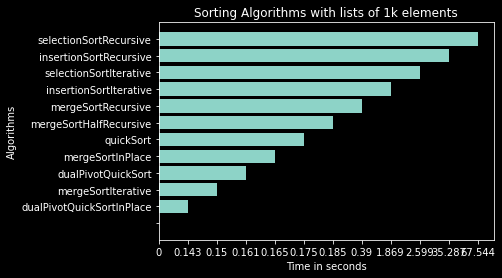

In [94]:
algos = [insertionSortRecursive, insertionSortIterative, selectionSortRecursive, selectionSortIterative, mergeSortRecursive, mergeSortHalfRecursive, mergeSortInPlace, mergeSortIterative, quickSort, dualPivotQuickSort, dualPivotQuickSortInPlace]
plotBest(bestAlgos(algos, testAmounts=50, listLength=1_000), title="Sorting Algorithms with lists of 1k elements")

..........................................................................................................................................................................................................................................................

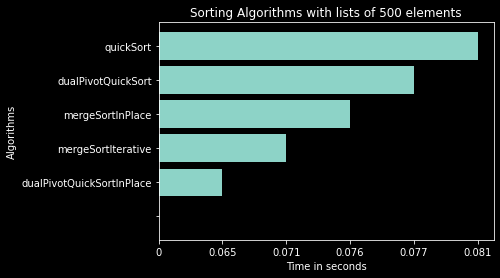

..........................................................................................................................................................................................................................................................

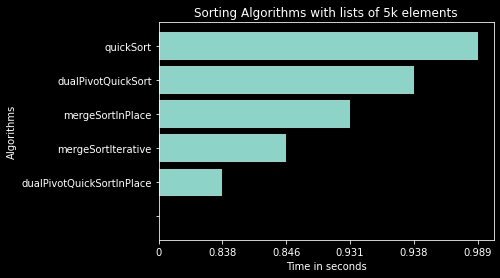

..........................................................................................................................................................................................................................................................

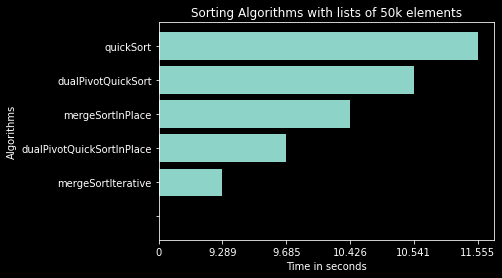

In [96]:
algos = [mergeSortIterative, mergeSortInPlace, quickSort, dualPivotQuickSort, dualPivotQuickSortInPlace]
plotBest(bestAlgos(algos, testAmounts=50, listLength=500), "Sorting Algorithms with lists of 500 elements")
plotBest(bestAlgos(algos, testAmounts=50, listLength=5_000), "Sorting Algorithms with lists of 5k elements")
plotBest(bestAlgos(algos, testAmounts=50, listLength=50_000), "Sorting Algorithms with lists of 50k elements")
plotBest(bestAlgos(algos, testAmounts=50, listLength=100_000), "Sorting Algorithms with lists of 100k elements")